# modeling testing - Kinney

## define imports and get data

In [119]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from titeseq_functions import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [120]:
fit_data_save_location = '/scratch/gthurber_root/gthurber0/marcase/titeseq/fit_data/'
binary_data = pd.read_csv(fit_data_save_location+'binary_jbkinney2016.csv')
continuous_data = pd.read_csv(fit_data_save_location+'jbkinney_fit_params.csv')

# binary data

In [121]:
binary_data = binary_data[['CDR1H_AA','CDR3H_AA','fluorescein10^-8bin0_A','fluorescein10^-8bin3_A','fluorescein10^-8bin0_B','fluorescein10^-8bin3_B','fluorescein10^-8bin0_C','fluorescein10^-8bin3_C']]
binary_data.index = binary_data['CDR1H_AA'] + '_' + binary_data['CDR3H_AA']
binary_data = binary_data.drop(columns=['CDR1H_AA','CDR3H_AA'])
binary_data = binary_data.rename(columns={'fluorescein10^-8bin0_A':'low_A','fluorescein10^-8bin3_A':'high_A','fluorescein10^-8bin0_B':'low_B','fluorescein10^-8bin3_B':'high_B','fluorescein10^-8bin0_C':'low_C','fluorescein10^-8bin3_C':'high_C'})
positive,negative = generateBinaryDataset(binary_data,data_type='illumina',replicate_cutoff=(2,2),percentile_cutoff=(0.8,0.2),zero_tolerance=True)
positive['label'] = 1
negative['label'] = 0

In [122]:
positive

,mean,label
KYSDYWMNWV_GSYYGMDYWG,137.101548,1
KFSDYWKNWV_GSYYGMDYWG,7.651430,1
KFSDYWMNRV_GSYYGMDYWG,9.107354,1
KFSDYWMNWV_GSYYGMDYWG,23.416217,1
KFIDYWMNWV_GSYYGMDYWG,45.526543,1
...,...,...
LFSDYWMNWV_GSYYGMDYWG,278.686395,1
LFSGYWMNWV_GSYYGMDYWG,43.109552,1
FFSDYWMNWC_GSYYGMDYWG,105.884432,1
LFSDYWMNWV_GSYYGMDYWG,128.198597,1


In [123]:
negative

,mean,label
NFSDYWENWL_GSYYGMDYWG,0.0,0
TTSDYWMNDV_GSYYGMDYWG,0.0,0
TISDGWMNWV_GSYYGMDYWG,0.0,0
TISDYWMRWV_GSYYGMDYWG,0.0,0
TQSDYWMNTV_GSYYGMDYWG,0.0,0
...,...,...
GRSDKWMNWV_GSYYGMDYWG,0.0,0
GFSDYWPTWV_GSYYGMDYWG,0.0,0
GFSDYWMNNV_GSYYGMDYWG,0.0,0
YFSDYWMNQV_GSYYGMDYWG,0.0,0


In [124]:
positive.index.intersection(negative.index)
# pd.concat([positive,negative],join='outer',axis=1)

Index(['TFSDYWMNRV_GSYYGMDYWG', 'TFSDYWMNDV_GSYYGMDYWG'], dtype='object')

## onehot encoding

In [ ]:
enc = OneHotEncoder()
seq = np.array(continuous_data.index.values).reshape(-1,1)
encoded = enc.fit(seq)
X = encoded.transform(seq).toarray()
y = continuous_data['Kd'].values

# continuous data

In [33]:
continuous_data.index = continuous_data['CDR1H_AA'] + '_' + continuous_data['CDR3H_AA']
continuous_data['Kd'] = continuous_data[['fit_KD_1','fit_KD_2','fit_KD_3']].mean(axis=1)
continuous_data = continuous_data[['Kd']]
continuous_data

,Kd
KYSDYWMNWV_GSYYGMDYWG,1.021372e-09
KCSDYWMNWV_GSYYGMDYWG,3.348775e-06
KFSDYDMNWV_GSYYGMDYWG,1.000000e-05
KFSDYSMNWV_GSYYGMDYWG,1.000000e-05
KFSDYWKNWV_GSYYGMDYWG,7.185173e-06
...,...
FRSDYWMNWV_GSYYGMDYWG,1.000000e-05
FFTDYWMNWV_GSYYGMDYWG,4.647704e-09
FFSDYWMNHV_GSYYGMDYWG,1.000000e-05
FFSDYWMNWV_GSYYGMDYWG,3.881699e-09


## one hot encoding



In [73]:
enc = OneHotEncoder()
seq = np.array(continuous_data.index.values).reshape(-1,1)
encoded = enc.fit(seq)
X = encoded.transform(seq).toarray()
y = continuous_data['Kd'].values

In [75]:
#scale output
scaler = StandardScaler()
y_tr = scaler.fit_transform(y.reshape(-1, 1))

In [87]:
X.shape
y_tr.shape

(3682, 1)

(array([ 863.,   34.,   34.,  149.,   60.,   34.,  213.,   95.,   58.,
        2142.]),
 array([-1.63256996, -1.39386773, -1.15516549, -0.91646326, -0.67776102,
        -0.43905878, -0.20035655,  0.03834569,  0.27704793,  0.51575016,
         0.7544524 ]),
 <BarContainer object of 10 artists>)

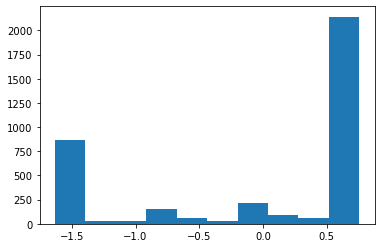

In [88]:
plt.hist(y_tr)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y_tr, test_size=0.3, random_state=42)

## test simple models

### linear regression

In [90]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

Text(0.5, 1.0, 'Training performance')

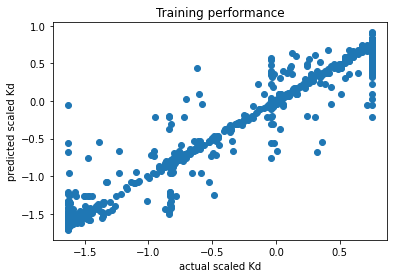

In [91]:
y_train_pred = reg.predict(X_train)
plt.scatter(y_train,y_train_pred)
plt.xlabel('actual scaled Kd')
plt.ylabel('predicted scaled Kd')
plt.title('Training performance')

Text(0.5, 1.0, 'Test performance')

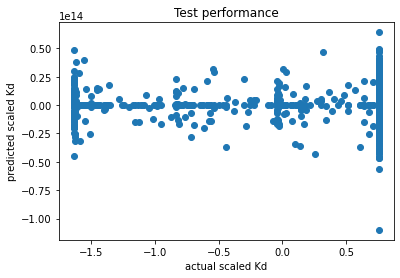

In [92]:
y_test_pred = reg.predict(X_test)
plt.scatter(y_test,y_test_pred)
plt.xlabel('actual scaled Kd')
plt.ylabel('predicted scaled Kd')
plt.title('Test performance')

### ridge

In [95]:
reg = linear_model.Ridge(alpha=0.5).fit(X_train,y_train)

Text(0.5, 1.0, 'Training performance')

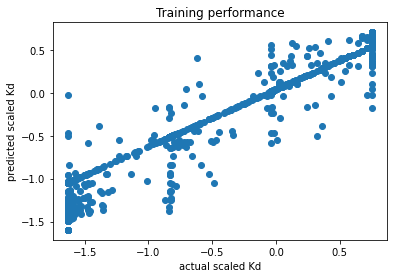

In [96]:
y_train_pred = reg.predict(X_train)
plt.scatter(y_train,y_train_pred)
plt.xlabel('actual scaled Kd')
plt.ylabel('predicted scaled Kd')
plt.title('Training performance')

Text(0.5, 1.0, 'Test performance')

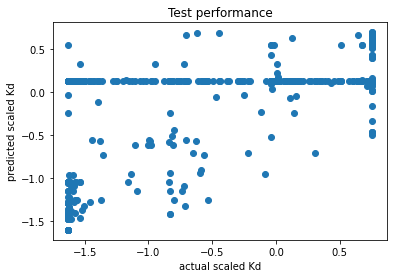

In [97]:
y_test_pred = reg.predict(X_test)
plt.scatter(y_test,y_test_pred)
plt.xlabel('actual scaled Kd')
plt.ylabel('predicted scaled Kd')
plt.title('Test performance')

### lasso

In [110]:
reg = linear_model.Lasso(alpha=0.00001).fit(X_train,y_train)

Text(0.5, 1.0, 'Training performance')

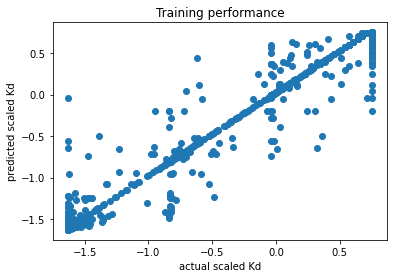

In [111]:
y_train_pred = reg.predict(X_train)
plt.scatter(y_train,y_train_pred)
plt.xlabel('actual scaled Kd')
plt.ylabel('predicted scaled Kd')
plt.title('Training performance')

Text(0.5, 1.0, 'Test performance')

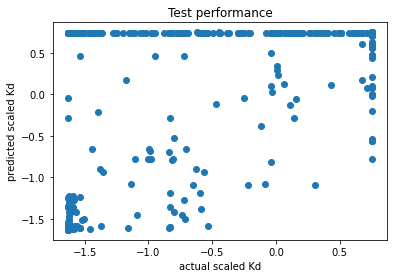

In [112]:
y_test_pred = reg.predict(X_test)
plt.scatter(y_test,y_test_pred)
plt.xlabel('actual scaled Kd')
plt.ylabel('predicted scaled Kd')
plt.title('Test performance')

/sw/pkgs/arc/python3.9-anaconda/2021.11/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Unknown label type: 'continuous'